In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from env import host, username, password
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import wrangle

In [2]:
# Call the function to get the Zillow data
zillow_df = wrangle.get_zillow_data()

# Write dataframe to CSV file
zillow_df.to_csv("zillow_data.csv", index=False)

In [3]:
#saving to a local csv file
get_zillow_data = wrangle.read_csv_file()

In [4]:
#showing the top 5 rows of the data aquired
get_zillow_data.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,propertylandusetypeid,roomcnt,yearbuilt,transactiondate,taxamount,taxvaluedollarcnt
0,1676733,12074482,3.0,3.0,2538.0,6037.0,39238.0,261.0,0.0,1966.0,2017-01-10,9635.37,878288.0
1,1593793,14502390,2.5,4.0,2761.0,6059.0,5800.0,261.0,0.0,1998.0,2017-01-10,8381.04,556255.0
2,2549761,17247479,2.5,3.0,1371.0,6111.0,4321.0,261.0,6.0,2012.0,2017-01-10,4705.74,404542.0
3,1627963,10937677,2.0,3.0,1676.0,6037.0,7025.0,261.0,0.0,1940.0,2017-01-10,3151.85,283892.0
4,246936,12620585,3.0,4.0,2352.0,6037.0,5398.0,261.0,0.0,1989.0,2017-01-10,3839.25,293034.0


In [5]:
#assigning data pulled to df
df = get_zillow_data

In [6]:
# Data describe
df.describe()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,propertylandusetypeid,roomcnt,yearbuilt,taxamount,taxvaluedollarcnt
count,5.244100e+04,5.244100e+04,52441.000000,52441.000000,52359.000000,52441.000000,5.207200e+04,52441.0,52441.000000,52325.000000,52437.000000,5.244000e+04
mean,1.497270e+06,1.299912e+07,2.299403,3.300681,1922.890754,6049.132149,1.133962e+04,261.0,1.893709,1963.393884,6453.511209,5.296882e+05
std,8.594393e+05,3.411444e+06,1.022772,0.949094,1004.365838,21.029067,8.674763e+04,0.0,3.146437,23.133571,8755.568452,7.518946e+05
min,3.490000e+02,1.071186e+07,0.000000,0.000000,128.000000,6037.000000,2.360000e+02,261.0,0.000000,1878.000000,49.180000,1.000000e+03
25%,7.579550e+05,1.151022e+07,2.000000,3.000000,1268.000000,6037.000000,5.583000e+03,261.0,0.000000,1950.000000,2656.220000,1.937475e+05
50%,1.500810e+06,1.257764e+07,2.000000,3.000000,1659.000000,6037.000000,6.840500e+03,261.0,0.000000,1961.000000,4647.740000,3.736120e+05
75%,2.241534e+06,1.412953e+07,3.000000,4.000000,2306.000000,6059.000000,8.798250e+03,261.0,5.000000,1979.000000,7377.500000,6.193012e+05
max,2.982270e+06,1.676878e+08,18.000000,14.000000,21929.000000,6111.000000,6.971010e+06,261.0,15.000000,2016.000000,586639.300000,4.906124e+07


In [7]:
# shape of data
df.shape

(52441, 13)

In [8]:
df = wrangle.prep_zillow(df)

Percentage of rows with missing values in all columns: 0.08%
Percentage of data not used: 0.00%


In [9]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt
0,3.0,3.0,2538.0,6037.0,39238.0,0.0,1966.0,878288.0
1,2.5,4.0,2761.0,6059.0,5800.0,0.0,1998.0,556255.0
2,2.5,3.0,1371.0,6111.0,4321.0,6.0,2012.0,404542.0
3,2.0,3.0,1676.0,6037.0,7025.0,0.0,1940.0,283892.0
4,3.0,4.0,2352.0,6037.0,5398.0,0.0,1989.0,293034.0


In [10]:
top_5 = df.nlargest(5, 'taxvaluedollarcnt')

In [11]:
top_5

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,yearbuilt,taxvaluedollarcnt
24709,6.5,5.0,6802.0,6059.0,24976.0,0.0,1999.0,4993132.0
26366,8.0,6.0,8706.0,6037.0,10963.0,0.0,1989.0,4984456.0
22690,5.0,5.0,5090.0,6037.0,7799.0,0.0,2015.0,4973709.0
35883,4.0,4.0,2570.0,6059.0,3728.0,8.0,1925.0,4961367.0
24070,4.0,3.0,3090.0,6037.0,17780.0,0.0,1955.0,4932794.0


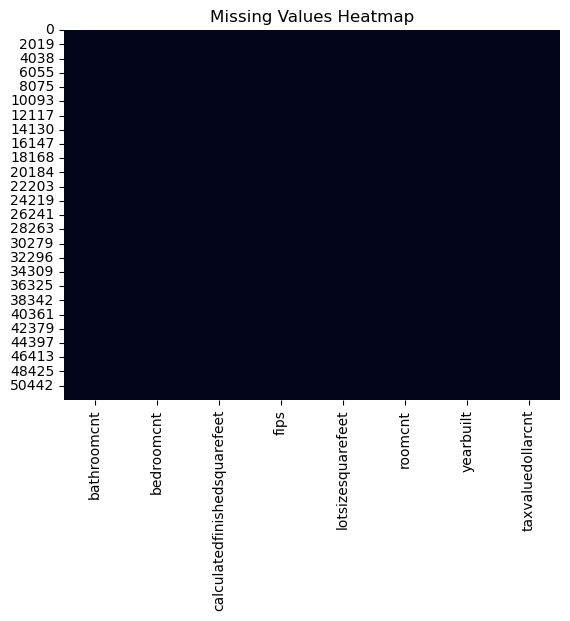

Missing Value Counts:
 bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
dtype: int64


In [12]:
# vizualizing nulls and leftover trash values
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count the missing values in each column
null_counts = df.isnull().sum()
print("Missing Value Counts:\n", null_counts)

Split data into 50% train 30% validate and 20% test datasets.

In [13]:
# Call the split_data function with the target variable 'taxvaluedollarcnt'
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_data(df, 'taxvaluedollarcnt')

In [22]:
type(X_train), type(y_train), type(X_validate), type(y_validate), type(X_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

view the X_train top 5 rows

In [14]:
X_train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,roomcnt,yearbuilt
48271,2.0,3.0,1121.0,6037.0,7694.0,0.0,1959.0
44187,2.0,3.0,1271.0,6037.0,6599.0,0.0,1951.0
47602,2.0,3.0,1200.0,6037.0,7467.0,0.0,1954.0
36968,2.0,3.0,1805.0,6037.0,17010.0,0.0,1957.0
31579,2.0,5.0,1248.0,6037.0,5895.0,0.0,1960.0


T-test and visual to test the hypothosis of if fips and calculated sq ft have any correlation

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top K features
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X_train, y_train)

# Get the indices of the top K features
top_features = selector.get_support(indices=True)

# Print the top K features
print(X_train.columns[top_features])


Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'yearbuilt'],
      dtype='object')


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


import pandas as pd
from sklearn.metrics import mean_squared_error

In [17]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 26118 entries, 48271 to 24580
Series name: taxvaluedollarcnt
Non-Null Count  Dtype  
--------------  -----  
26118 non-null  float64
dtypes: float64(1)
memory usage: 408.1 KB
